In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import unidecode
%matplotlib inline

In [96]:
from pattern.en import sentiment, polarity, subjectivity
def sentiment(text):
    return polarity(text)

def subj(text):
    return subjectivity(text)

In [97]:
hilary = pd.read_csv('old_notebooks/hilary_comments2.csv')
hilary['Sentiment'] = hilary.apply(lambda row: sentiment(row['Comment']), axis = 1)
hilary['Subjectivity'] = hilary.apply(lambda row: subj(row['Comment']), axis = 1)
hilary['Sentiment2'] = hilary['Comment'] 

In [101]:
def sentiment_new(text):
    def remove_html_tags(data):
        p = re.compile(r'<[^<]*?>')
        return p.sub('', data)

    def Sentences(paragraph):
        sentenceEnders = re.compile('[.!?]')
        sentenceList = sentenceEnders.split(paragraph)
        return sentenceList

    content = remove_html_tags(text)
    content = unidecode.unidecode(content).replace("\n"," ").replace("\'", " ")
    s_max = 0
    comment_score = 0

    for i in Sentences(content):
        if abs(sentiment(i)) > abs(s_max):
            comment_score = sentiment(i)
            s_max = sentiment(i)
    return comment_score

In [118]:
def subj_new(text):
    def remove_html_tags(data):
        p = re.compile(r'<[^<]*?>')
        return p.sub('', data)

    def Sentences(paragraph):
        sentenceEnders = re.compile('[.!?]')
        sentenceList = sentenceEnders.split(paragraph)
        return sentenceList

    content = remove_html_tags(text)
    content = unidecode.unidecode(content).replace("\n"," ").replace("\'", " ")
    s_max = 0
    comment_score = 0

    for i in Sentences(content):
        if abs(subj(i)) > abs(s_max):
            comment_score = subj(i)
            s_max = subj(i)
    return comment_score

In [102]:
hilary['Sentiment2'] = hilary['Comment'].apply(lambda row: sentiment_new(row))


/Users/datascientist/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: Argument <type 'str'> is not an unicode object. Passing an encoded string will likely have unexpected results.


In [ ]:
hilary['Subj2'] = hilary['Comment'].apply(lambda row: subj_new(row))

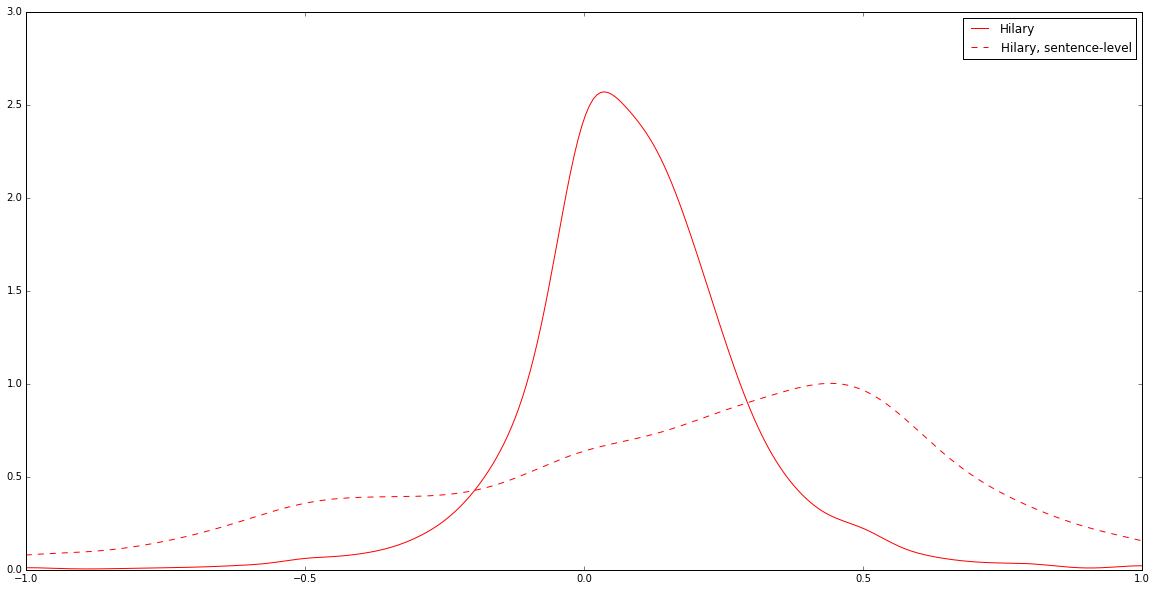

In [109]:
from scipy.stats import gaussian_kde
plt.figure(figsize=(12,8))

data = hilary['Sentiment']
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'r', label = 'Hilary')

data = hilary['Sentiment2']
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'r--', label = 'Hilary, sentence-level')
plt.title("Comments for Hilary Clinton, Degree of Sentiment")
plt.legend()


In [ ]:
plt.figure(figsize=(12,8))

data = hilary['Subj2']
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'b', label = 'Hilary')

data = hilary['Subj2']
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'b--', label = 'Hilary, sentence-level')
plt.title("Comments for Hilary Clinton, Degree of Sentiment")
plt.legend()



In [115]:
hilary_scores = hilary.to_csv('hilary_scores.csv')

In [111]:
trump = pd.read_csv('old_notebooks/trump_comments2.csv')
trump['Sentiment'] = trump.apply(lambda row: sentiment(row['Comment']), axis = 1)
trump['Subjectivity'] = trump.apply(lambda row: subj(row['Comment']), axis = 1)
trump['Sentiment2'] = trump['Comment'] 
trump['Sentiment2'] = trump['Comment'].apply(lambda row: sentiment_new(row))

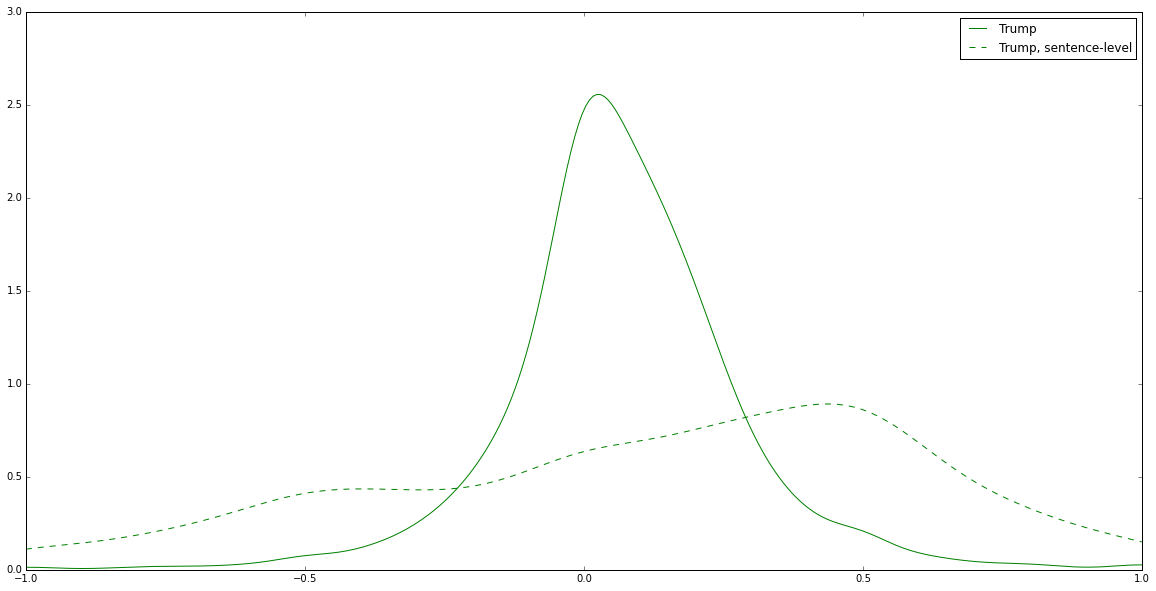

In [113]:
plt.figure(figsize=(20,10))

data = trump['Sentiment']
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'g', label = 'Trump')

data = trump['Sentiment2']
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'g--', label = 'Trump, sentence-level')
plt.legend()

In [114]:
trump_scores = trump.to_csv('trump_scores.csv')

In [116]:
biden = pd.read_csv('old_notebooks/biden_comments2.csv')
biden['Sentiment'] = biden.apply(lambda row: sentiment(row['Comment']), axis = 1)
biden['Subjectivity'] = biden.apply(lambda row: subj(row['Comment']), axis = 1)
biden['Sentiment2'] = biden['Comment'] 
biden['Sentiment2'] = biden['Comment'].apply(lambda row: sentiment_new(row))

/Users/datascientist/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: Argument <type 'str'> is not an unicode object. Passing an encoded string will likely have unexpected results.


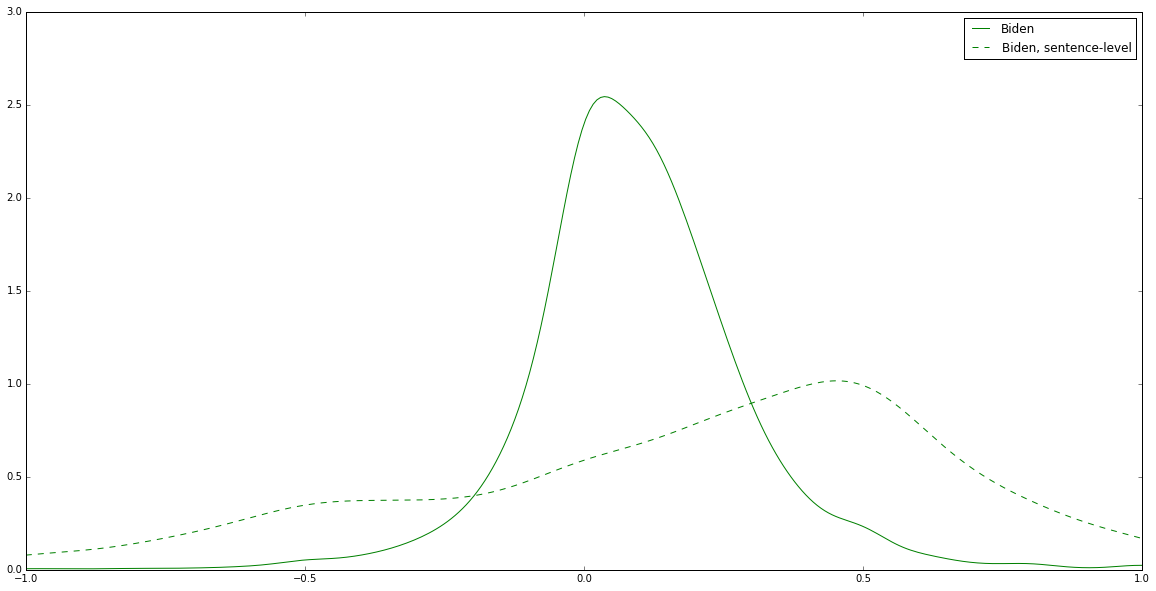

In [117]:
plt.figure(figsize=(20,10))

data = biden['Sentiment']
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'g', label = 'Biden')

data = biden['Sentiment2']
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'g--', label = 'Biden, sentence-level')
plt.legend()

In [ ]:
biden_scores = biden.to_csv('biden_scores.csv')